---

# Optimize Marketing Expense for Yandex.Afisha

#### Project description:

We are working on a project in the analytical department at Yandex.Afisha.Our first task is to help optimize marketing expenses. 

##### Data description

The visits table (server logs with data on website visits):
- Uid — user's unique identifier
- Device — user's device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):
- Uid — unique identifier of the user making an order
- Buy Ts — order date and time
- Revenue — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):
- source_id — ad source identifier
- dt — date
- costs — expenses on this ad source on this day

#### Steps to take:
- Step 1: Open the data file and study the general information.
- Step 2: Prepare the data/Preprocessing data
    - We will view the data in more detail to convert them to the required types, replace the coluimn names and find missing values.Find and eliminate errors in the data.
- Step 3: Analyze the data 
    - 1.Product:
         - How many people use it every day, week, and month?
         - How many sessions are there per day? (One user might have more than one session.)
         - What is the length of each session?
         - How often do users come back?
    - 2.Sales:
        - When do people start buying? 
        - How many orders do they make during a given period of time?
        - What is the average purchase size?
        - How much money do they bring? (LTV)
       
     - 3. Marketing:
         - How much money was spent? Overall/per source/over time
         - How much did customer acquisition from each of the sources cost?
         - How worthwhile where the investments? (ROI)
         
    Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time
    

- Step 5: 
   - Advise marketing experts how much money to invest and where.
   - What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? 
   - Why? What conclusions did you draw after finding the metric values?
  
#### Goal:
Our goal is to help optimize marketing expenses for Yandex.Afisha


## Steps followed to complete the project:

## Step 1. Open the data file and study the general information

In [40]:
##### Import default libraries
import pandas as pd # manipulate and wrangle the data  
import numpy as np
import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics

from scipy import stats # for mathematics, science, and engineering
from math import ceil as math
from scipy import stats as st

#read data from file
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [31]:
##### preview the loaded data
visits.info()

# return the top n- rows of dataframe
visits.head(10)

#visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [2]:
##### preview the loaded data
orders.info()

# return the top n- rows of dataframe
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [33]:
##### preview the loaded data
costs.info()

# return the top n- rows of dataframe
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


## Step 2. Preprocessing

In [41]:
# modify visits column names

visits = visits.rename(columns={'Device': 'device_type', 'End Ts':'end_date', 'Start Ts':'start_date', 'Source Id':'source_id','Uid':'user_id'})
#visits.info()

orders = orders.rename(columns={'Buy Ts': 'order_date', 'Revenue':'revenue', 'Uid':'user_id' })
#orders.info()

costs = costs.rename(columns={'dt': 'ad_date', 'costs':'ad_cost'})
#costs.info()

#converting float data numbers into string type
visits['device_type'] = visits['device_type'].astype(str)

visits['start_date'] = pd.to_datetime(visits['start_date'])
visits['end_date'] = pd.to_datetime(visits['end_date'])

costs['ad_date'] = pd.to_datetime(costs['ad_date'])
orders['order_date'] = pd.to_datetime(orders['order_date'])



In [42]:
# check for duplicate rows

print (visits.duplicated().sum())
print (orders.duplicated().sum())
print (costs.duplicated().sum())



0
0
0


In [8]:
# checking null columns

visits.isnull().sum()
orders.isnull().sum()
costs.isnull().sum()

source_id    0
ad_date      0
ad_cost      0
dtype: int64

In [8]:
# Drop any duplicates in the database
visits.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
costs.drop_duplicates(inplace=True)

#Conclusion: There is no duplicates and null values in these datasets.


#### Conclusion:
We checked the general information of 'visits','orders','costs' datasets. Upon checking data, we found that the datasets are much cleaner. We didn't find any big issues and discrepancies.  However, there are some minor issues that are listed below:
 - converted the datatypes of some date column to date type
 - renamed the column names of datasets to remove space in between
 - checked for any blank records and duplicates

## Step 3. Make report and calculate metrics

### Make Reports and Calculate Product Metrics:

In [43]:
#Product:How many people use it every day, week, and month?

# add columns for day, week, month values

visits['session_year'] = visits['start_date'].astype("datetime64[Y]")
visits['session_month'] = visits['start_date'].astype("datetime64[M]")
visits['session_week']  = visits['start_date'].astype("datetime64[W]")

visits['session_date'] = visits['start_date'].astype("datetime64[D]")

# calculate DAU (daily active unique)
dau_total = visits.groupby('session_date').agg({'user_id':'nunique'}).reset_index()
dau_total.columns = ['session_date', 'users']
dau_mean = dau_total['users'].mean()

print('Daily Total Usage: ' + str(dau_mean.round(decimals = 2)) + ' users')

    


Daily Total Usage: 907.99 users


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


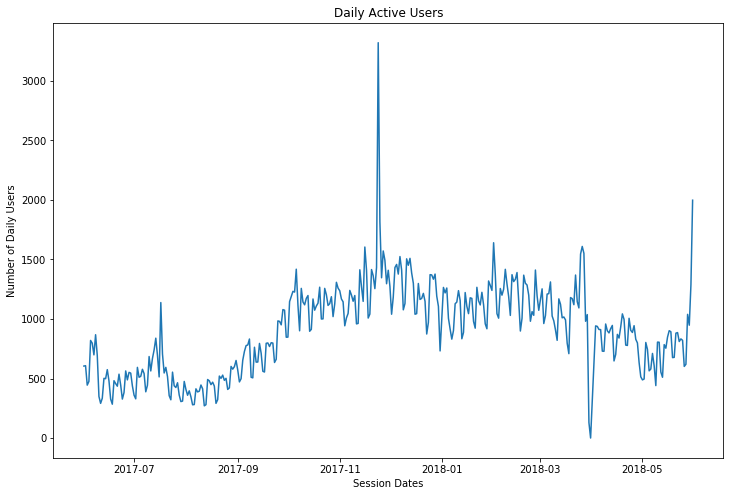

In [5]:
# plot daily users
plt.figure(figsize=(12,8))
plt.plot(dau_total['session_date'],dau_total['users'])
plt.title("Daily Active Users")
plt.xlabel("Session Dates")
plt.ylabel("Number of Daily Users")
plt.show()

Weekly Total Usage: 5724.42 users


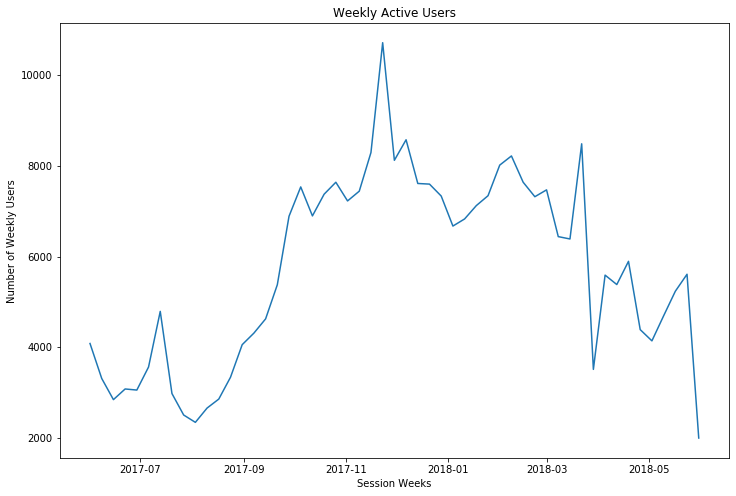

In [46]:
# calculate WAU (weekly active unique)
wau_total = visits.groupby('session_week').agg({'user_id':'nunique'}).reset_index()
wau_total.columns = ['session_week', 'users']
wau_mean = wau_total['users'].mean()
print('Weekly Total Usage: ' + str(wau_mean.round(decimals = 2)) + ' users')

      
# plot weekly users
plt.figure(figsize=(12,8))
plt.plot(wau_total['session_week'],wau_total['users'])
plt. title("Weekly Active Users")
plt. xlabel("Session Weeks")
plt. ylabel("Number of Weekly Users")
plt.show()

Monthly Total Usage: 23228.42 users


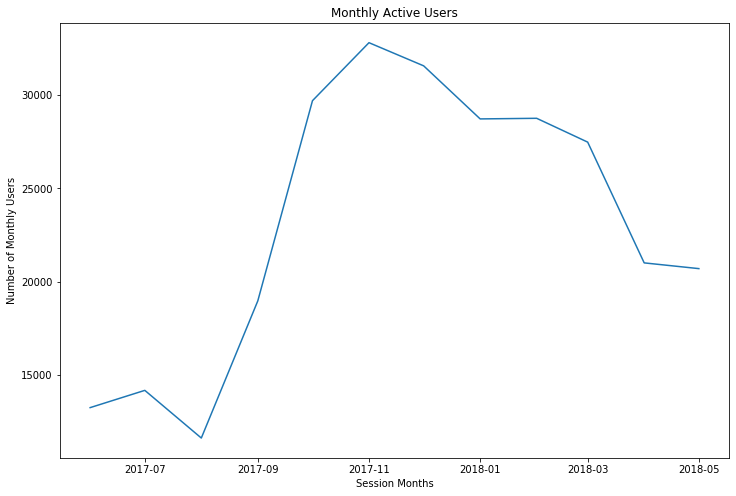

In [47]:
# calculate MAU (monthly active unique)
mau_total = visits.groupby('session_month').agg({'user_id':'nunique'}).reset_index()
mau_total.columns = ['session_month', 'users']
mau_mean = mau_total['users'].mean()
print('Monthly Total Usage: ' + str(mau_mean.round(decimals = 2)) + ' users')

# plot monthly users
plt.figure(figsize=(12,8))
plt.plot(mau_total['session_month'],mau_total['users'])
plt. title("Monthly Active Users")
plt. xlabel("Session Months")
plt. ylabel("Number of Monthly Users")
plt.show()


### Conclusion:
To calculate daily, weekly and monthly activities, we first created separate columns of the year, month, and week values. We grouped the data by session date, week, and month and calculated the means.

The number of daily users of Yandex. Afisha is 908. '2017-11-24' date is the highest visited while '2018-03-31' date is lowest visited. The number of weekly users is 5825 and the number of monthly users is 23228.


987.36 sessions per day


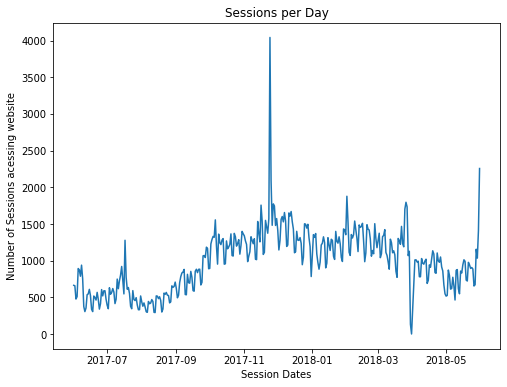

In [49]:
# Product:How many sessions are there per day?
#One user might have more than one session

sessions_perday = visits.groupby('session_date').agg({'user_id':['count','nunique']}).reset_index()
sessions_perday.columns = ['session_date','sessions','users']
sessions_perday_mean = sessions_perday['sessions'].mean()

print(str(sessions_perday_mean.round(decimals=2)) + ' sessions per day')

# plot sessions
plt.figure(figsize=(8,6))
plt.plot(pd.to_datetime(sessions_perday['session_date']),sessions_perday['sessions'])
plt.title('Sessions per Day')
plt.xlabel('Session Dates')
plt.ylabel('Number of Sessions acessing website')
plt.show()

### Conclusion:

To calculate the unique sessions per day, we grouped the visit data by session date and counted the number of unique users and the number of unique sessions.
It is useful to determine the number of sessions per use per month as it is a good indicator of app usage frequency.

There are 987.36 unique sessions per day for Yandex.Afisha.


 The length per session: 300.0 secs


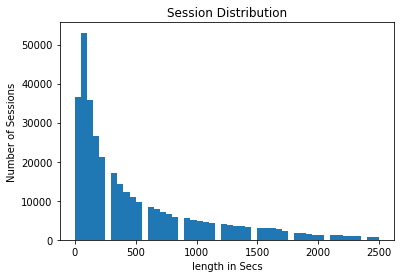

In [51]:
# What is the length of each session?

visits['session_duration_sec'] = (visits['end_date'] - visits['start_date']).dt.seconds

#length_per_session = visits['session_duration_sec'].mean()
length_per_session = visits['session_duration_sec'].median()
print(" The length per session: " + str(length_per_session.round(decimals=2)) + " secs")

#plotting
plt.hist(visits['session_duration_sec'],range=[0,2500],bins=50)
plt.title('Session Distribution')
plt.xlabel('length in Secs')
plt.ylabel('Number of Sessions')
plt.show()

### Conclusion:
To calculate the length of each session, we calculated the difference of session end date and start date.

The average length of per session is 300 secs.

15.86 users come back weekly
3.91 users come back monthly


Text(0, 0.5, 'Number of Returning Users')

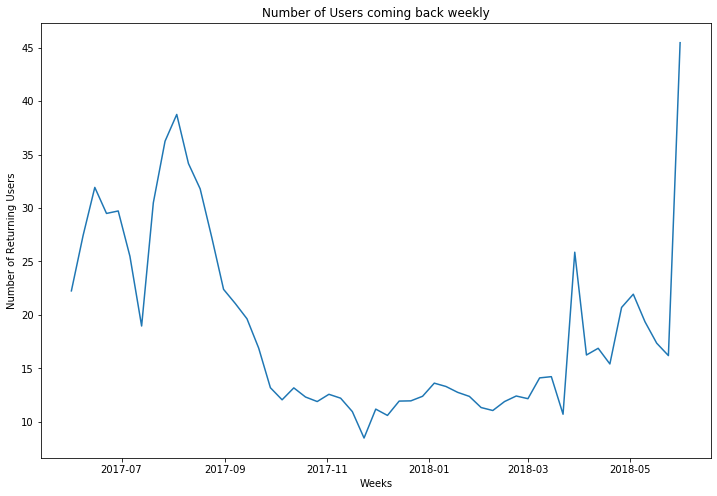

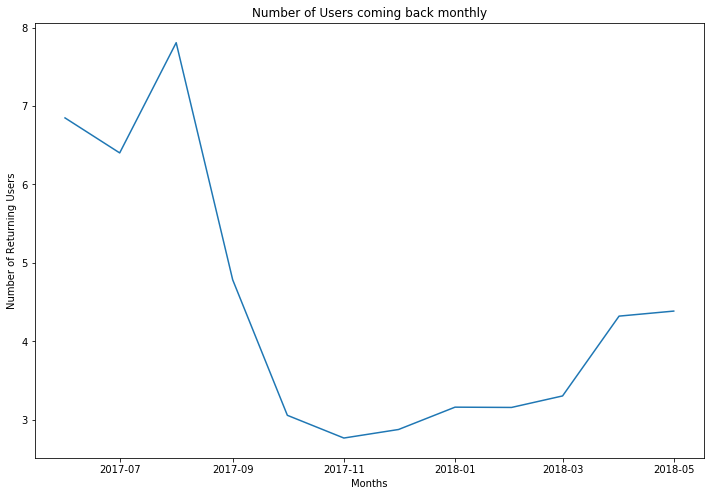

In [52]:
# 1. Product: How often do users come back (Returning customers)?
#ASL
# calculate sticky factor metrics
sticky_weekly_mean = (dau_mean / wau_mean) * 100
print(str(sticky_weekly_mean.round(decimals=2)) + " users come back weekly")

sticky_monthly_mean = (dau_mean / mau_mean) * 100
print(str(sticky_monthly_mean.round(decimals=2)) + " users come back monthly")

# plotting for weekly sticky factor metrics
wau_total['stickyfactor_weekly'] = (dau_mean / wau_total['users']) * 100
plt.figure(figsize=(12,8))
plt.plot(wau_total['session_week'],wau_total['stickyfactor_weekly'])
plt. title("Number of Users coming back weekly")
plt. xlabel("Weeks")
plt. ylabel("Number of Returning Users")

# plotting for monthly sticky factor metrics
mau_total['stickyfactor_monthly'] = (dau_mean / mau_total['users']) * 100
plt.figure(figsize=(12,8))
plt.plot(mau_total['session_month'],mau_total['stickyfactor_monthly'])
plt. title("Number of Users coming back monthly")
plt. xlabel("Months")
plt. ylabel("Number of Returning Users")

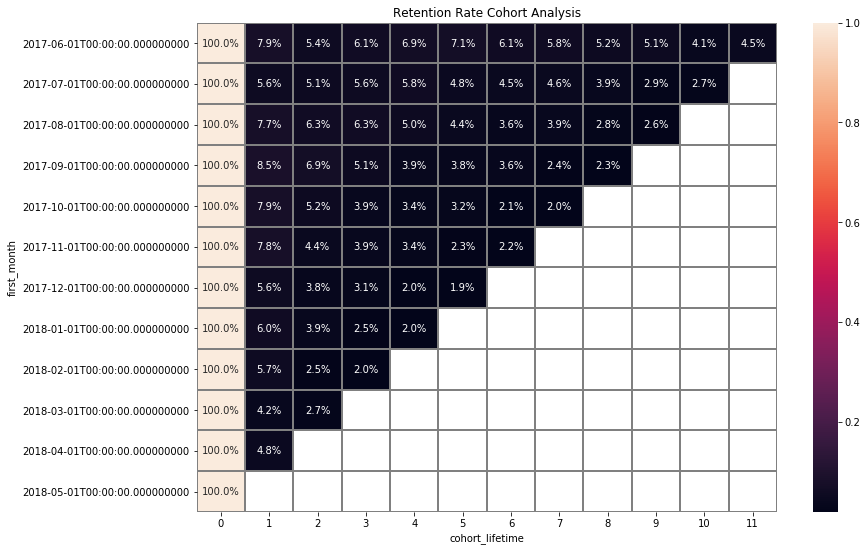

In [53]:
#How often do users come back (returning customers)?

#Retention rate cohort analysis
first_order_date = visits.groupby('user_id').agg({'start_date':'min'}).reset_index()
first_order_date.columns = ['user_id','first_order_date']

user_visits = visits.merge(first_order_date, on='user_id')
#print(user_visits)
user_visits['order_month'] = user_visits['start_date'].astype('datetime64[M]')
user_visits['first_month'] = user_visits['first_order_date'].astype('datetime64[M]')

user_visits['cohort_lifetime'] = ( user_visits['order_month'] - user_visits['first_month'] ) 
user_visits['cohort_lifetime'] = (user_visits[ 'cohort_lifetime' ] / np.timedelta64(1, 'M')).round().astype(int)

cohorts = (user_visits.groupby(['first_month', 'cohort_lifetime']).agg({'user_id': 'nunique'})\
           .reset_index())

first_visits_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month', 'user_id']]
first_visits_count = first_visits_count.rename(columns={'user_id': 'cohort_users'}) 
cohorts = cohorts.merge(first_visits_count, on='first_month')

cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(index='first_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate Cohort Analysis')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

#### Conclusion:
To calculate how often users come back, we calculated the sticky factor metrics in weeks and months. The sticky factor metric tells how loyal the audience is. 

Based on sticky factor metric, 16% of users come back weekly whereas 4% of users come back monthly.

Based on heatmap above, we can conclude that June 2017 had the highest retention rate of 11 months. After first month, all cohorts retention went down and is less than 10%. May 2018 has the least rention rate.



### Make Reports and Calculate Sales Metrics:

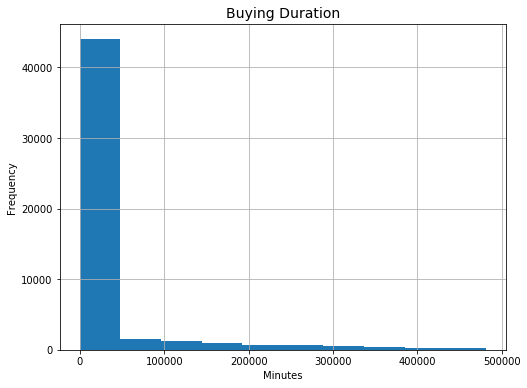

On average people start buying in 0 minutes


In [54]:
#2.Sales: When do people start buying?

orders['order_month'] = orders['order_date'].astype('datetime64[M]') 
first_orders = orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_month']

user_orders = pd.merge(orders,first_orders, on='user_id')

user_orders['duration'] = (user_orders['order_month'] - user_orders['first_month']) / np.timedelta64(1, 'm')
user_orders['duration'] = user_orders['duration'].round().astype('int')
user_orders['duration'].hist(figsize=(8,6))

plt.title('Buying Duration', fontdict={"size":14})
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()
print('On average people start buying in '+ str(round(int(user_orders['duration'].mode()))) + ' minutes')

### Conclusion:
On average people start buying or place their first orders right after (immediately) they login to on the Yandex.afisha. 

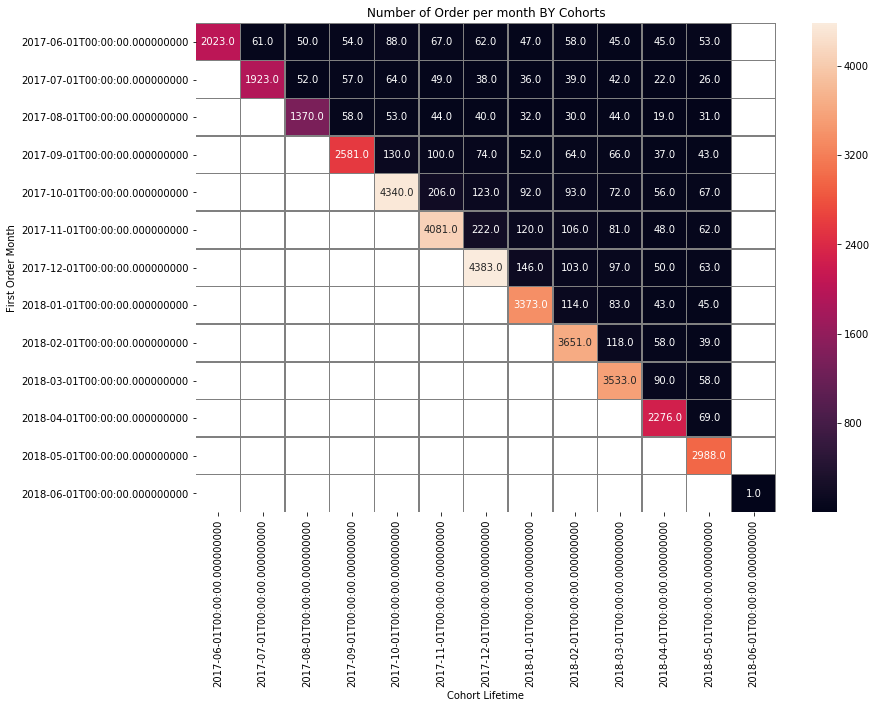

In [55]:
#2.Sales: How many orders do they make during a given period of time?

# get first order month
orders['order_date'] = orders['order_date'].astype('datetime64[D]')
#print(orders)
first_orders = orders.groupby('user_id').agg({'order_date': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_date']

# merge first orders and orders
orders_ = pd.merge(orders,first_orders, on='user_id')
#print(orders_)
orders_['first_order_month'] = orders_['first_order_date'].astype('datetime64[M]')
orders_['order_month'] = orders_['order_date'].astype('datetime64[M]')

#print(orders_)
monthly_order_bycohorts = orders_.pivot_table(index='first_order_month',
                        columns='order_month',
                        values='user_id',
                        aggfunc='nunique')

plt.figure(figsize=(13, 9))
sns.heatmap(monthly_order_bycohorts, annot=True, linewidths=.5,fmt = '.1f', linecolor='gray')
plt.title('Number of Order per month BY Cohorts')
plt.xlabel('Cohort Lifetime')
plt.ylabel('First Order Month')
plt.show()



#### Conclusion:
On December 2017, Customer made highest orders of 4383. This is followed by October 2017, and November 2017. This is probably holiday shopping. The June,2017 and July,2017 have the least number of orders.It's probability because in summer, people tend to go outside and do summer activities like vacations and beaches. 

In [16]:
#2.Sales:What is the average purchase size?
print('Total revenue: '+ str(orders['revenue'].sum().round(decimals=2)))
print('Average purchase size: '+ str(orders['revenue'].mean().round(decimals=2)))

Total revenue: 252057.2
Average purchase size: 5.0


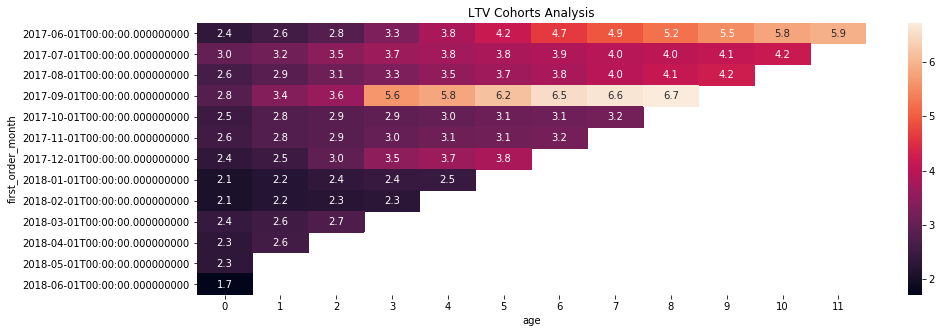

In [58]:
#2.Sales:How much money do they bring? (LTV)

orders['order_date'] = pd.to_datetime(orders['order_date'])
costs['ad_date'] = pd.to_datetime(costs['ad_date'])

orders['order_month'] = orders['order_date'].astype('datetime64[M]')
costs['month'] = costs['ad_date'].astype('datetime64[M]')


first_orders = orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_month']


cohort_size  = (
    first_orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
)

#cohort_size.columns = ['first_order_month', 'buyers']
cohort_size.rename(columns={'user_id': 'buyers'}, inplace=True)

user_orders_visit = pd.merge(orders,first_orders, on='user_id')

cohorts = (user_orders_visit.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())

report = pd.merge(cohort_size, cohorts, on='first_order_month')

margin_rate = .5

report['grossprofit'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['order_month'] = report['order_month'].dt.month
report['ltv'] = report['grossprofit'] / report['buyers']

ltv_pivot= report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)

# Set the figure size
# Set the visualization title
# Make a heatmap

plt.figure(figsize=(15, 5))
plt.title('LTV Cohorts Analysis')
sns.heatmap(ltv_pivot, annot=True, fmt='.1f');
plt.show()





### Conclusion:
LTV (lifetime value) is the total amount of money a customer brings to the company on average by making purchases. It is an estimate of the average revenue that a customer will generate throughout their lifespan as a customer To calculate LTV, we should consider the gross revenue/profit from a buyer per period. To do that, we first grouped the data by 'first_order_month' users and by purchase month 'order_month'. We plotted a pivot table that showed a change in revenue per user by the purchase month and then calculated LTV from that.

Based on the heatmap plotted above, June 2017 cohort had the longest duration of age 11(LTV) while September 2017 cohort had the highest LTV 6.72. Cohorts in April, May, June 2018 had the least LTVs.


### Make Reports and Calculate Marketing Metrics:

Overall amount spent on marketing was $329131.62


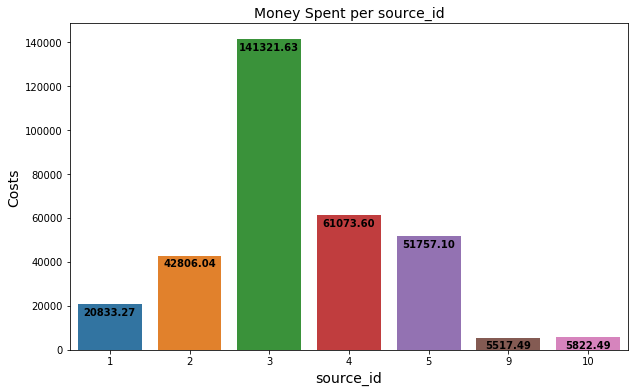

In [62]:
#3.Marketing: How much money was spent? Overall/per source/over time


# Overall
print('Overall amount spent on marketing was $' + str(costs['ad_cost'].sum()))

# per source
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
splot=sns.barplot(y='total_cost', x= 'source_id', data=cost_per_source)  
ax.set_title('Money Spent per source_id', fontdict={"size":14})
plt.xlabel('source_id', fontdict={"size":14})
plt.ylabel('Costs', fontdict={"size":14})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext= (0, -8), 
                   textcoords = 'offset points', weight='bold')

    


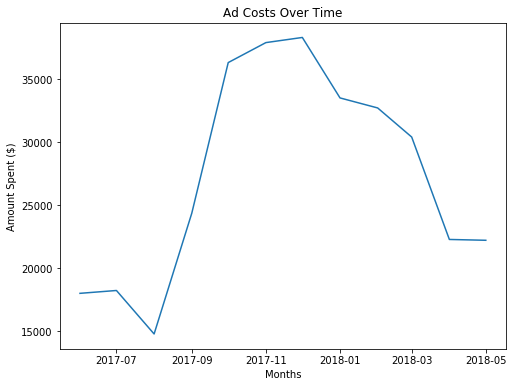

In [63]:
# Over time
costs['month'] = costs['ad_date'].astype('datetime64[M]')
costs_overtime = costs.groupby('month').agg({'ad_cost':'sum'}).reset_index()
costs_overtime.columns = ['month','cost']

plt.figure(figsize=(8,6))
plt.plot(costs_overtime['month'],costs_overtime['cost'])
plt.title('Ad Costs Over Time')
plt.xlabel('Months')
plt.ylabel('Amount Spent ($)')
plt.show()

### Conclusion:
Overall, $329131.62 amount was spent on marketing.There were about 7 different sources recorded. The source that we spent most is source no.3 ( about 141000) whereas spent least on sources 9 and 10.

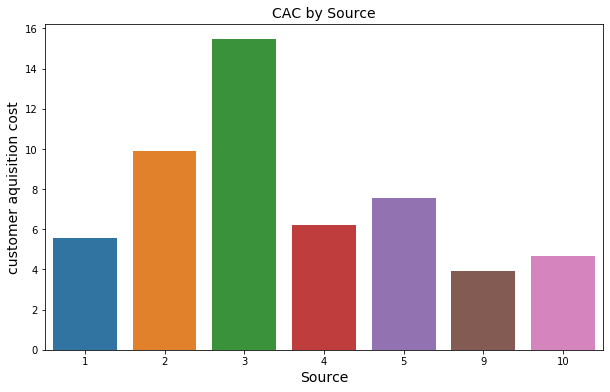

In [68]:
#3.Marketing: How much did customer acquisition from each of the sources cost?

#CAC by source

User_withsource = visits[['user_id', 'source_id']]

User_withsource= User_withsource.drop_duplicates(subset=['user_id'], keep='first')

orders_ = orders_.merge(User_withsource, on= 'user_id')
#print(orders_)
CAC_Cohort = orders_.groupby(['source_id'], as_index=False).agg({'user_id':'nunique'}).rename(columns={'user_id':'buyers', 'source_id': 'source_id'})
#print(CAC_Cohort)
#print(costs)
source_costs = costs.groupby('source_id').agg({'ad_cost': 'sum'}).reset_index()

CAC_bySource = CAC_Cohort.merge(source_costs, on='source_id')

CAC_bySource['cac'] = CAC_bySource['ad_cost'] / CAC_bySource['buyers']
#print(CAC_bySource)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
splot=sns.barplot(y="cac", x= "source_id", data=CAC_bySource.sort_values(ascending =False, by= "cac" ))  
ax.set_title("CAC by Source", fontdict={"size":14})
plt.xlabel("Source", fontdict={"size":14})
plt.ylabel("customer aquisition cost", fontdict={"size":14})

plt.show()


### Conclusion:
The source with the highest cost is no. 3 whereas no.9 has the least cost. Sources no.1 and no.2 are comparatively having lower costs than platform 3. 

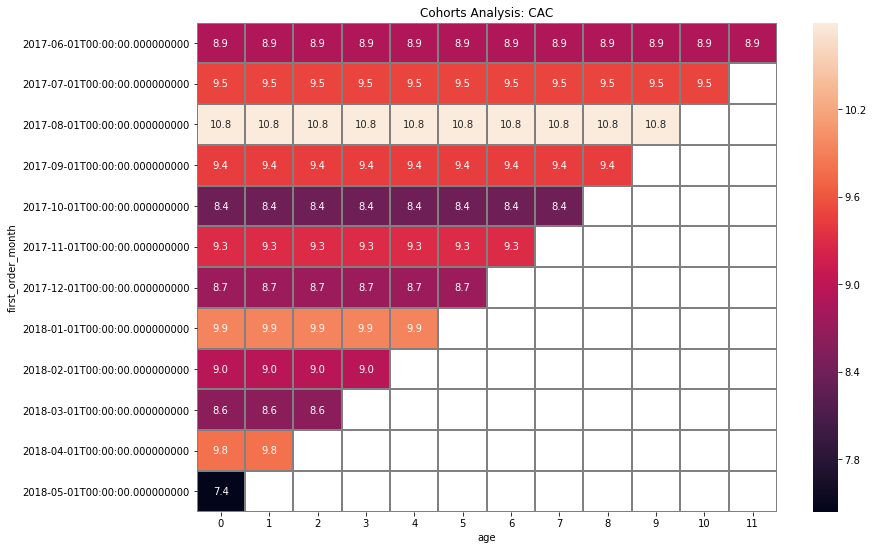

In [69]:
#CAC by month/cohort
#print(costs)

#Grouping cost by month
costs['cost_month'] = costs['ad_date'].astype('datetime64[M]')
monthly_costs = costs.groupby('cost_month')['ad_cost'].sum()
monthly_costs.head()
#print(report)
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='cost_month')
#report_.head()

report_['cac'] = report_['ad_cost'] / report_['buyers']
cac_pivot= report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='cac', 
    aggfunc='mean')

plt.figure(figsize=(13, 9))
plt.title('Cohorts Analysis: CAC')
sns.heatmap(cac_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

### Conclusion:
CAC (customer acquisition cost) is the cost of attracting a customer - the money a new customer costs a company. This is calculated as marketing expenses divided by the number of customers.

Based on the heatmap plotted above, CAC per month/cohorts shows a uniform but different costs for each cohort.The August 2017 cohort had the highest cost in a given month while the May 2018 cohort had the least.


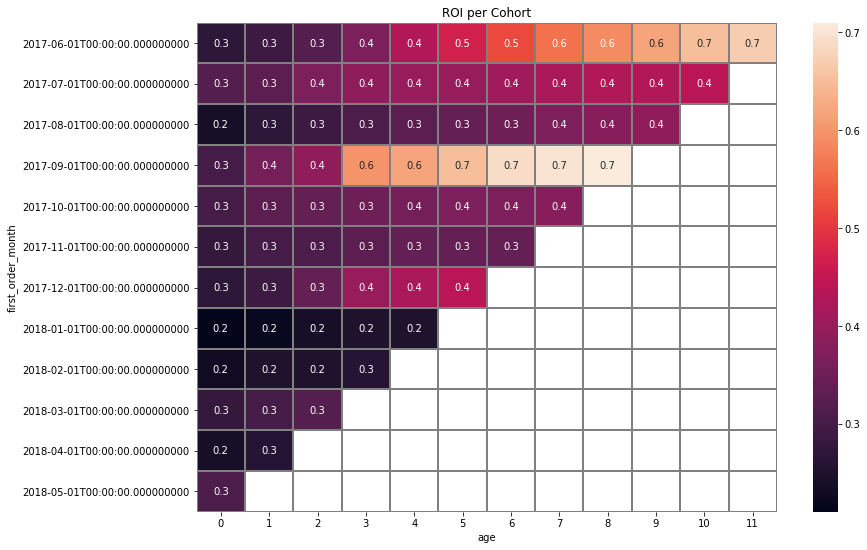

In [70]:
#3.Marketing.(ROI)How worthwhile were the investments?
#ROI = LTV / CAC

report_['romi'] = report_['ltv'] / report_['cac']

output = report_.pivot_table(index='first_order_month', columns='age',values='romi',aggfunc='mean')
output = output.cumsum(axis=1).round(2)

# Set the figure size
# Set the visualization title
# Make a heatmap


plt.figure(figsize=(13,9))
plt.title('ROI per Cohort')
sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

### Conclusion:
ROMI (return on marketing investment) is a metric of investment quality for marketing campaigns. Its formula is ROMI of ad campaign = campaign's gross profit/expenses.
The conversion rate is the share of people who changed their status within a business process.

Based on the heatmap plot above, September 2017 cohort had the highest return on investments, followed by the June 2017 cohort. May 2018 cohort had the lowest return on investments.Overall, none of the cohorts had compensated for the money spent. 

### Overall Conclusion:
On Average, 907.99 customers use Yandex.Afisha every day. The highest visit was on November 24 which was black Friday. Likewise, 5825.29 customers use Yandex.Afisha every week and 23228.42 customers every month.
There are about 987 unique sessions per day for Yandex.Afisha. The average length of a session is 300 secs (5 mins). Based on the sticky factor metric, 16% of users come back weekly whereas 4% of users come back monthly. Likewise, June 2017 had the highest retention rate of 11 months. May 2018 has the least retention rate.

On average people start buying or place their first orders right after (immediately) they log in to on the Yandex.afisha. They make about .82 orders per month. The average purchase size is about 5.0.

The lifetime value, a customer brings to the company varies from 1.71 to 6.72. September 2017 cohort had the highest LTV while cohorts in April, may, June 2018 had the least LTVs.

Overall, the amount spent on marketing was $329131.62. CAC (customer acquisition cost) was highest in, August 2017. It's probably because we launched some marketing campaign that month.

Based on ROMI plotting, the investments had not been worthwhile. We should come up with a better marketing strategy to compensate for investment expenses.
